In [ ]:
import cv2 , os

In [ ]:
from google.colab import drive
drive.mount

<function google.colab.drive.mount>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data_path="/content/drive/My Drive/dataset"
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))
print(label_dict)
print(categories)
print(labels)


{'with_mask': 0, 'without_mask': 1}
['with_mask', 'without_mask']
[0, 1]


In [ ]:
img_size=100
data=[]
target= []

for  category in categories:
     folder_path=os.path.join(data_path,category)
     img_names=os.listdir(folder_path)

     for img_name in img_names:
         img_path=os.path.join(folder_path,img_name)
         img=cv2.imread(img_path)

         try:
              gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
              resized=cv2.resize(gray,(img_size,img_size))
              data.append(resized)
              target.append(label_dict[category])
         except Exception as e:
              print('Exception:',e)




In [ ]:
! pip install tensorflow

In [ ]:
! pip install keras

In [ ]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils
new_target=np_utils.to_categorical(target)


Using TensorFlow backend.


In [ ]:
data

array([[[[0.99607843],
         [0.99607843],
         [0.99607843],
         ...,
         [0.99607843],
         [0.99607843],
         [0.99607843]],

        [[1.        ],
         [1.        ],
         [0.99607843],
         ...,
         [0.99607843],
         [0.99607843],
         [0.99607843]],

        [[0.99607843],
         [0.99607843],
         [0.98431373],
         ...,
         [0.18431373],
         [0.97254902],
         [0.98431373]],

        ...,

        [[0.99607843],
         [0.99215686],
         [0.98039216],
         ...,
         [0.1254902 ],
         [0.97647059],
         [0.98823529]],

        [[0.99607843],
         [0.99215686],
         [0.98431373],
         ...,
         [0.1254902 ],
         [0.97647059],
         [0.98823529]],

        [[0.99607843],
         [0.99215686],
         [0.98431373],
         ...,
         [0.1372549 ],
         [0.98039216],
         [1.        ]]],


       [[[1.        ],
         [1.        ],
         [1.  

In [ ]:
data.shape

(1376, 100, 100, 1)

In [ ]:
new_target.shape

(1376, 2)

In [ ]:
np.save('data',data)
np.save('target',new_target)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(100,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])





In [ ]:
a=data.shape[1:]
a

(100, 100, 1)

In [ ]:
test_target.shape

(138,)

In [ ]:
train_target.shape

(1238,)

In [ ]:
test_data.shape

(138, 100, 100, 1)

In [ ]:
train_data.shape

(1238, 100, 100, 1)

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_new_target,test_new_target=train_test_split(data,new_target,test_size=0.1)


In [ ]:
checkpoint=ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_new_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 42s 42ms/step - loss: 0.7135 - accuracy: 0.5364 - val_loss: 0.6510 - val_accuracy: 0.6815
Epoch 2/20
990/990 [==============================] - 41s 42ms/step - loss: 0.5500 - accuracy: 0.7283 - val_loss: 0.4716 - val_accuracy: 0.7863
Epoch 3/20
990/990 [==============================] - 41s 42ms/step - loss: 0.3662 - accuracy: 0.8434 - val_loss: 0.3062 - val_accuracy: 0.8911
Epoch 4/20
990/990 [==============================] - 41s 42ms/step - loss: 0.2328 - accuracy: 0.9141 - val_loss: 0.2270 - val_accuracy: 0.9234
Epoch 5/20
990/990 [==============================] - 41s 42ms/step - loss: 0.1642 - accuracy: 0.9323 - val_loss: 0.1951 - val_accuracy: 0.9315
Epoch 6/20
990/990 [==============================] - 42s 42ms/step - loss: 0.1169 - accuracy: 0.9596 - val_loss: 0.3058 - val_accuracy: 0.8992
Epoch 7/20
990/990 [==============================] - 41s 42ms/step - loss: 0.1020 - accur

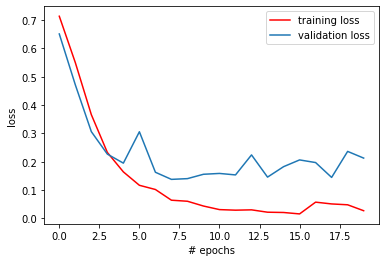

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

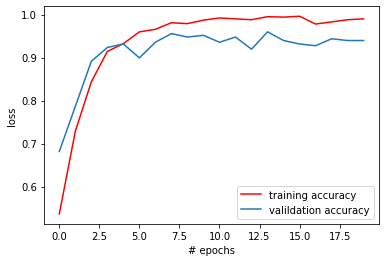

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='valildation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_new_target))

138/138 [==============================] - 2s 11ms/step
[0.12367993019575226, 0.95652174949646]


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
from keras.preprocessing import image


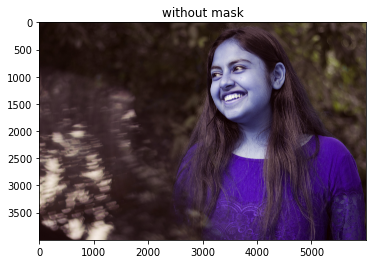

In [ ]:
#testing=test_data
#fig=plt.figure()
#for num,data in enumerate(testing[:12]):
  #img_num=data[1]
  #img_data=data[0]
  #y=fig.add_subplot(3,4,num+1)
  #orig=img_data
  #data=img_data#.reshape(100,100,1)
  #data.shape=(12,100,100,1)
pathtest="/content/drive/My Drive/IMG_9416.jpg"
img_size=100
img=cv2.imread(pathtest)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resized=cv2.resize(gray,(img_size,img_size))
data=[]
data.append(resized)
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
results=model.predict(data)
#model_out=model.predict([test_data])
if np.argmax(results) == 1 : str_label ='without mask'
else: str_label = 'with mask'

y.imshow(img,cmap='gray')
plt.title(str_label)
y.axes.get_xaxis().set_visible(False)
y.axes.get_yaxis().set_visible(False)
plt.imshow(img)
  


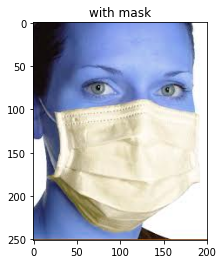

In [ ]:
pathtest="/content/drive/My Drive/testify.jpg"
img_size=100
img=cv2.imread(pathtest)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resized=cv2.resize(gray,(img_size,img_size))
data=[]
data.append(resized)
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
results=model.predict(data)
#model_out=model.predict([test_data])
if np.argmax(results) == 1 : str_label ='without mask'
else: str_label = 'with mask'

y.imshow(img,cmap='gray')
plt.title(str_label)
y.axes.get_xaxis().set_visible(False)
y.axes.get_yaxis().set_visible(False)
plt.imshow(img)
  


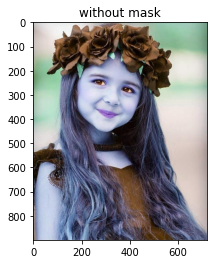

In [ ]:
pathtest="/content/drive/My Drive/testify2.jpg"
img_size=100
img=cv2.imread(pathtest)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resized=cv2.resize(gray,(img_size,img_size))
data=[]
data.append(resized)
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
results=model.predict(data)
#model_out=model.predict([test_data])
if np.argmax(results) == 1 : str_label ='without mask'
else: str_label = 'with mask'

y.imshow(img,cmap='gray')
plt.title(str_label)
y.axes.get_xaxis().set_visible(False)
y.axes.get_yaxis().set_visible(False)
plt.imshow(img)
  


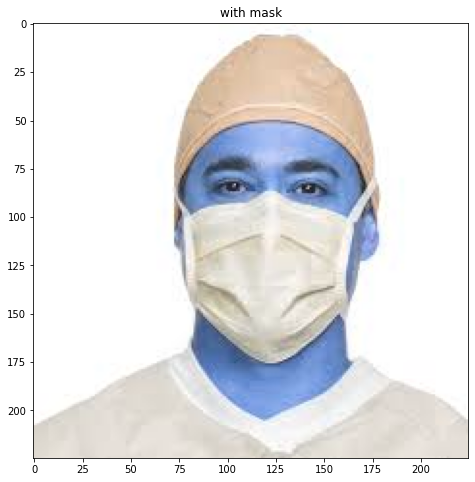

In [ ]:
pathtest="/content/drive/My Drive/testify3.jpg"
img_size=100
img=cv2.imread(pathtest)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resized=cv2.resize(gray,(img_size,img_size))
data=[]
data.append(resized)
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
results=model.predict(data)
#model_out=model.predict([test_data])
if np.argmax(results) == 1 : str_label ='without mask'
else: str_label = 'with mask'

#y.imshow(img,cmap='gray')
plt.title(str_label)
#y.axes.get_xaxis().set_visible(False)
#y.axes.get_yaxis().set_visible(False)
plt.imshow(img)

In [ ]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg \
    -O test.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

--2020-07-15 09:46:55--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240458 (235K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 234.82K  --.-KB/s    in 0.05s   

2020-07-15 09:46:56 (4.37 MB/s) - ‘test.jpg’ saved [240458/240458]

--2020-07-15 09:46:58--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting respo

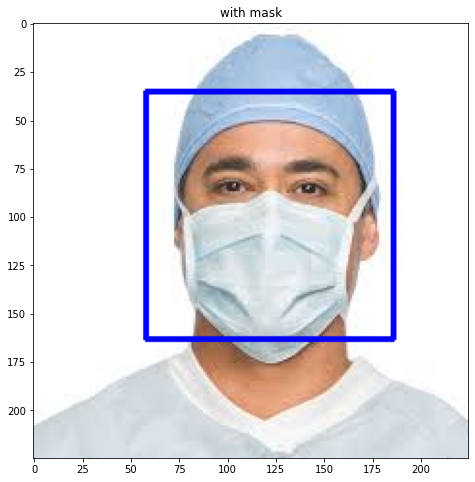

In [ ]:
test_image = cv2.imread("/content/drive/My Drive/testify3.jpg")
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
pathtest="/content/drive/My Drive/testify3.jpg"
img_size=100
img=cv2.imread(pathtest)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#faces=face_cascade.detectMultiScale(gray,1.3,5)
resized=cv2.resize(gray,(img_size,img_size))
data=[]
data.append(resized)
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
results=model.predict(data)
#model_out=model.predict([test_data])
if np.argmax(results) == 1 : str_label ='without mask'
else: str_label = 'with mask'

#y.imshow(img,cmap='gray')
plt.title(str_label)
#y.axes.get_xaxis().set_visible(False)
#y.axes.get_yaxis().set_visible(False)
#plt.imshow(img)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

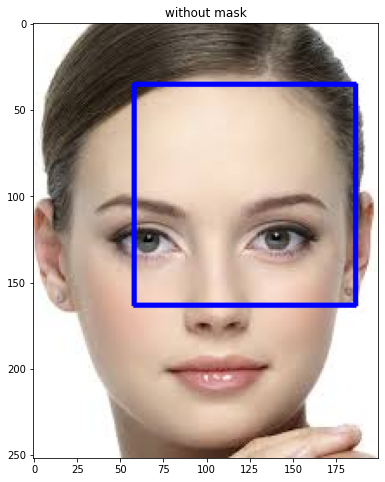

In [ ]:
test_image = cv2.imread("/content/drive/My Drive/testify4.jpg")
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
pathtest="/content/drive/My Drive/testify4.jpg"
img_size=100
img=cv2.imread(pathtest)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#faces=face_cascade.detectMultiScale(gray,1.3,5)
resized=cv2.resize(gray,(img_size,img_size))
data=[]
data.append(resized)
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
results=model.predict(data)
#model_out=model.predict([test_data])
if np.argmax(results) == 1 : str_label ='without mask'
else: str_label = 'with mask'

#y.imshow(img,cmap='gray')
plt.title(str_label)
#y.axes.get_xaxis().set_visible(False)
#y.axes.get_yaxis().set_visible(False)
#plt.imshow(img)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

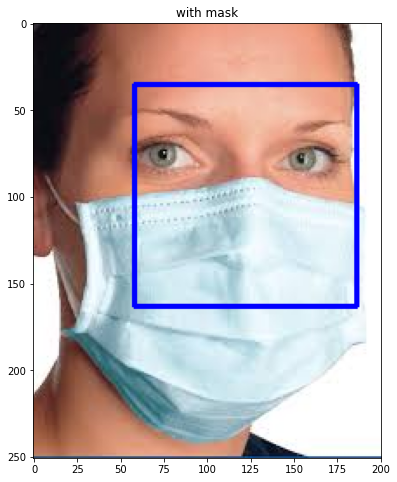

In [ ]:
test_image = cv2.imread("/content/drive/My Drive/testify.jpg")
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
pathtest="/content/drive/My Drive/testify.jpg"
img_size=100
img=cv2.imread(pathtest)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#faces=face_cascade.detectMultiScale(gray,1.3,5)
resized=cv2.resize(gray,(img_size,img_size))
data=[]
data.append(resized)
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
results=model.predict(data)
#model_out=model.predict([test_data])
if np.argmax(results) == 1 : str_label ='without mask'
else: str_label = 'with mask'

#y.imshow(img,cmap='gray')
plt.title(str_label)
#y.axes.get_xaxis().set_visible(False)
#y.axes.get_yaxis().set_visible(False)
#plt.imshow(img)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

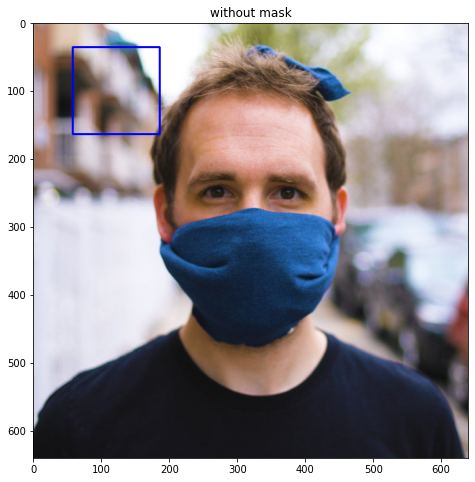

In [ ]:
test_image = cv2.imread("/content/drive/My Drive/testify1.jpg")
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
pathtest="/content/drive/My Drive/testify1.jpg"
img_size=100
img=cv2.imread(pathtest)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#faces=face_cascade.detectMultiScale(gray,1.3,5)
resized=cv2.resize(gray,(img_size,img_size))
data=[]
data.append(resized)
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
results=model.predict(data)
#model_out=model.predict([test_data])
if np.argmax(results) == 1 : str_label ='without mask'
else: str_label = 'with mask'

#y.imshow(img,cmap='gray')
plt.title(str_label)
#y.axes.get_xaxis().set_visible(False)
#y.axes.get_yaxis().set_visible(False)
#plt.imshow(img)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

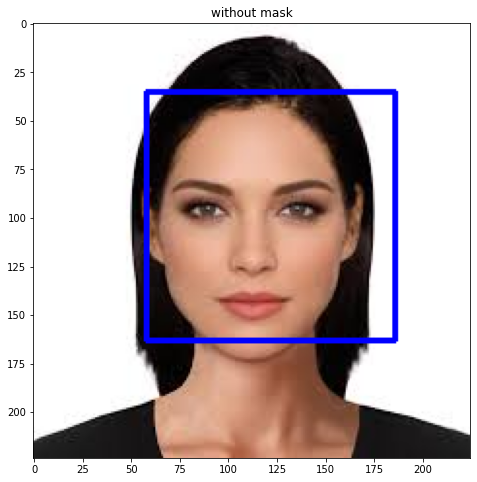

In [ ]:
test_image = cv2.imread("/content/drive/My Drive/testify5.jpg")
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
pathtest="/content/drive/My Drive/testify5.jpg"
img_size=100
img=cv2.imread(pathtest)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#faces=face_cascade.detectMultiScale(gray,1.3,5)
resized=cv2.resize(gray,(img_size,img_size))
data=[]
data.append(resized)
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
results=model.predict(data)
#model_out=model.predict([test_data])
if np.argmax(results) == 1 : str_label ='without mask'
else: str_label = 'with mask'

#y.imshow(img,cmap='gray')
plt.title(str_label)
#y.axes.get_xaxis().set_visible(False)
#y.axes.get_yaxis().set_visible(False)
#plt.imshow(img)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

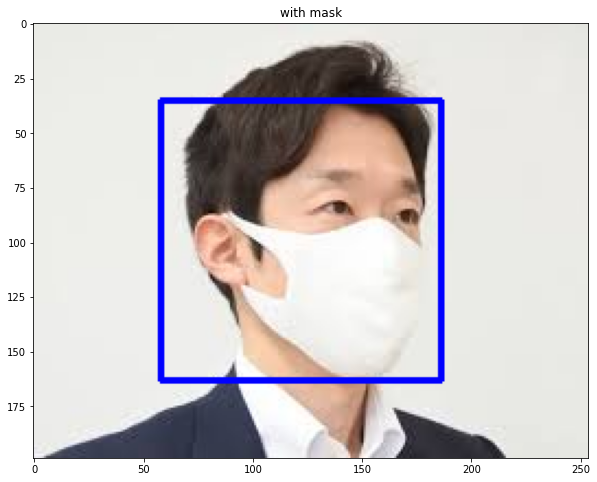

In [ ]:
test_image = cv2.imread("/content/drive/My Drive/testify6.jpg")
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
pathtest="/content/drive/My Drive/testify6.jpg"
img_size=100
img=cv2.imread(pathtest)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#faces=face_cascade.detectMultiScale(gray,1.3,5)
resized=cv2.resize(gray,(img_size,img_size))
data=[]
data.append(resized)
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
results=model.predict(data)
#model_out=model.predict([test_data])
if np.argmax(results) == 1 : str_label ='without mask'
else: str_label = 'with mask'

#y.imshow(img,cmap='gray')
plt.title(str_label)
#y.axes.get_xaxis().set_visible(False)
#y.axes.get_yaxis().set_visible(False)
#plt.imshow(img)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

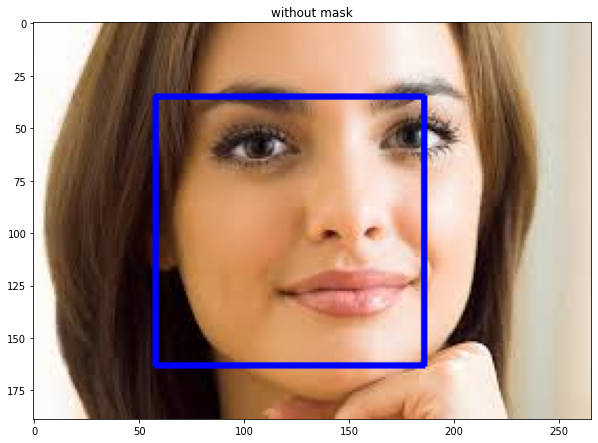

In [ ]:
test_image = cv2.imread("/content/drive/My Drive/testify7.jpg")
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
pathtest="/content/drive/My Drive/testify7.jpg"
img_size=100
img=cv2.imread(pathtest)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#faces=face_cascade.detectMultiScale(gray,1.3,5)
resized=cv2.resize(gray,(img_size,img_size))
data=[]
data.append(resized)
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
results=model.predict(data)
#model_out=model.predict([test_data])
if np.argmax(results) == 1 : str_label ='without mask'
else: str_label = 'with mask'

#y.imshow(img,cmap='gray')
plt.title(str_label)
#y.axes.get_xaxis().set_visible(False)
#y.axes.get_yaxis().set_visible(False)
#plt.imshow(img)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

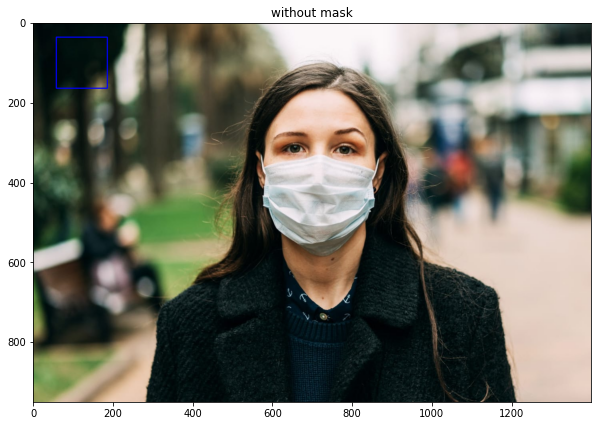

In [ ]:
test_image = cv2.imread("/content/drive/My Drive/testify8.jpg")
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
pathtest="/content/drive/My Drive/testify8.jpg"
img_size=100
img=cv2.imread(pathtest)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#faces=face_cascade.detectMultiScale(gray,1.3,5)
resized=cv2.resize(gray,(img_size,img_size))
data=[]
data.append(resized)
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
results=model.predict(data)
#model_out=model.predict([test_data])
if np.argmax(results) == 1 : str_label ='without mask'
else: str_label = 'with mask'

#y.imshow(img,cmap='gray')
plt.title(str_label)
#y.axes.get_xaxis().set_visible(False)
#y.axes.get_yaxis().set_visible(False)
#plt.imshow(img)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [ ]:
THANK YOU